In [18]:
from scipy.stats import entropy
from scipy.signal import find_peaks
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['font.size'] = 12

In [2]:
negctrlfile = '../data/unique.0.eventalign.tsv'
posctrlfile = '../data/unique.500.eventalign.tsv'
chromatinfile = '../data/240113_chrom_pass.sorted.eventalign.txt'
tssbedfile = '../data/ref/alltss_withm.bed'
genomefile = '../data/ref/sacCer3.fa'
negcollapsefile = '../data/unique.0.nanocompore.collapse/out_eventalign_collapse.tsv'
poscollapsefile = '../data/unique.500.nanocompore.collapse/out_eventalign_collapse.tsv'
peaksfile = 'angelicin_ctrl_sig_dist_peaks_count.tsv'

In [3]:
samples = ['neg', 'pos']
files =  [negctrlfile, posctrlfile]
collapsefiles = [negcollapsefile, poscollapsefile]

In [4]:
####to get signal distribution from positive and negative control eventalign data

for i in range(2):
    print(samples[i])
    kmertosignal = {}
    file = files[i]
    for line in open(file):
        line = line.split('\t', 10)
        kmer = line[9]
        signalmean = line[6]
        if kmer not in kmertosignal: kmertosignal[kmer] = []
        kmertosignal[kmer].append(signalmean)
    kmerToHistDist = {}
    for kmer in kmertosignal:
        sigs = kmertosignal[kmer]
        hist, bin_edges = np.histogram(sigs, range(40, 141), density=True)
        kmerToHistDist[kmer] = list(hist)

    out = open('../data/angelicin_' + samples[i] + 'ctrl_sig_dist_precalculated_hist.tsv', 'w')
    for kmer in kmerToHistDist:
        out.write(kmer + '\t' + ','.join([str(x) for x in kmerToHistDist[kmer]]) + '\n')
    out.close()

neg


/private/groups/brookslab/gabai/miniconda3/envs/addseq/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges
/private/groups/brookslab/gabai/miniconda3/envs/addseq/lib/python3.9/site-packages/numpy/lib/histograms.py:883: RuntimeWarning: divide by zero encountered in divide
  return n/db/n.sum(), bin_edges


pos


In [23]:
###to calculate and plot peaks for individual kmers from the signal distributions

kmerpeaks = {}
for line in open('../data/angelicin_posctrl_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)
for line in open('../data/angelicin_negctrl_sig_dist_precalculated_hist.tsv'):
    line = line.rstrip().split('\t')
    hist = [float(x) for x in line[1].split(',')]
    if line[0] not in kmerpeaks: kmerpeaks[line[0]] = [hist]
    else: kmerpeaks[line[0]].append(hist)

GGCGCG
1 1
TATATA
2 1
ACATCC
1 1
CGTTAC
1 1


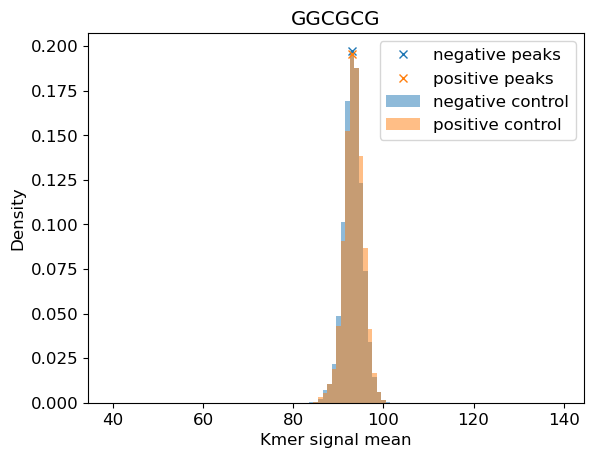

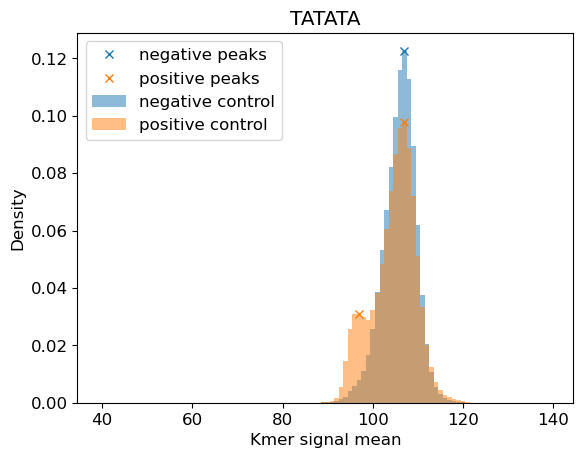

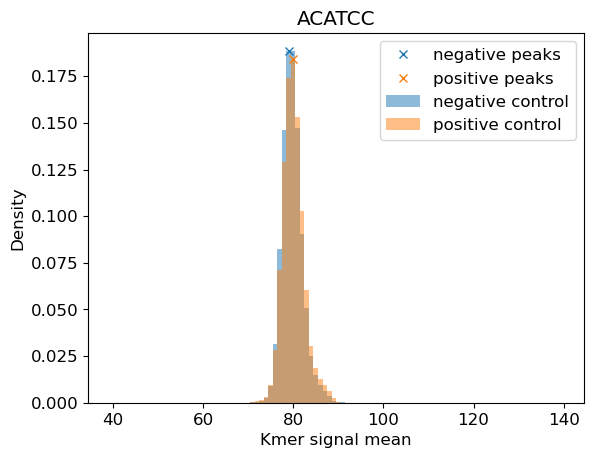

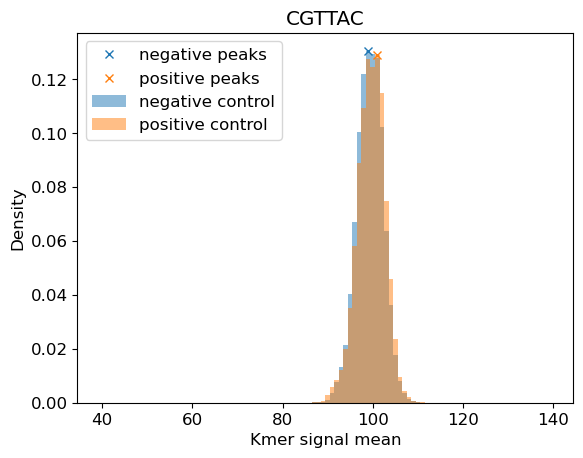

In [20]:
###first value is pos dist, second value is negative dist

kmerlist = ['GGCGCG', 'TATATA', 'ACATCC', 'CGTTAC']
for kmer in kmerlist:
    print(kmer)
    pos, neg = kmerpeaks[kmer]
    pospeaks, _ = find_peaks(pos, prominence=0.001, distance=5)
    negpeaks, _ = find_peaks(neg, prominence=0.001, distance=5)
    print(len(pospeaks), len(negpeaks))
    plt.figure()
    plt.bar(range(40,140), neg, width=1, label="negative control", alpha=0.5)
    plt.bar(range(40, 140), pos, width=1, label="positive control", alpha=0.5)
    plt.plot([x+40 for x in negpeaks], [neg[x] for x in negpeaks], 'x', label='negative peaks')
    plt.plot([x+40 for x in pospeaks], [pos[x] for x in pospeaks], 'x', label='positive peaks')
    plt.xlabel('Kmer signal mean')
    plt.ylabel('Density')
    plt.title(kmer)
    plt.legend()
    plt.savefig("../figures/Figure1_angelicin_ctrl_sig_dist_" + kmer + "_withpeaks.pdf", dpi=600)

In [24]:
#### to generate a file with which kmers have two peaks, this is what feeds into the goodkmers list

kmerpeakslist = []
for kmer in kmerpeaks:
    pos, neg = kmerpeaks[kmer]
    pospeaks, _ = find_peaks(pos, prominence=0.001, distance=5)
    negpeaks, _ = find_peaks(neg, prominence=0.001, distance=5)
    kmerpeakslist.append((kmer, len(negpeaks), len(pospeaks)))
kmerpeakslist.sort(key=lambda x:x[-1], reverse=True)
out = open('../data/angelicin_ctrl_sig_dist_peaks_count.tsv', 'w')
l = []
for k in kmerpeakslist:
    if k[2] > 1: l.append(k[0])#print(k[0])
    out.write('\t'.join([str(x) for x in k]) + '\n')
out.close()

In [26]:
### To identify modification probability at informative bases in the chromatin data based on the control signal distributions

goodkmers = ['NNNNNN', 'TATCCA', 'TATACT', 'TACGTA', 'TATATA', 'TATATC', 'TATCTC', 'TATAAC', 'TATGTC', 'TACAGA', 'TATCAT', 'TATCAC', 'TACATT', 'TATGAT', 'TGATAC', 'TATCTT', 'TATGCT', 'TATGTG', 'TACGAA', 'TATCTA', 'CGATAC', 'TACGTT', 'TATCAG', 'TACAGT', 'TATGCC', 'TACGTG', 'TATGGA', 'TATAAG', 'TATGGC', 'TATGCG', 'TATAGG', 'TATAAA', 'TATCCG', 'CTCGTA', 'TATCAA', 'TATGTA', 'TATCCC', 'TATCTG', 'TACAGG', 'TATGAG', 'TATGGT', 'TATCCT', 'TACGAG', 'TATATG', 'TATGAA', 'TATAGA', 'CTAATA', 'TATCGA', 'CCAATA', 'TACGAC', 'TATCGG', 'TACGGA', 'TATCGC', 'TACGGG', 'CGATAA', 'TATGGG', 'TATGAC', 'TATAGC']
kmerposprob = {}
for kmer in kmerpeaks:
    posprob = []
    pos, neg = kmerpeaks[kmer]
    pospeaks, _ = find_peaks(pos, prominence=0.001, distance=5)
    peakheight = sorted([(round(pos[x], 3), x) for x in pospeaks])
    angpeak, normpeak = peakheight[0][1], peakheight[1][1]
    # print(kmer, peakheight[1][1]-peakheight[0][1], peakheight)
    for i in range(len(neg)):
        sum = pos[i] + neg[i]
        if sum < 0.0001: posprob.append(0)
        else:
            if abs(i-angpeak) < abs(i-normpeak):
                posprob.append(round(pos[i]/sum, 2))
            else: posprob.append(0)
    kmerposprob[kmer] = posprob
print('processing eventalign')
genomeToOpenCalls = {}
for line in open(chromatinfile):
    line = line.split('\t')
    kmer = line[9]
    if kmer in kmerposprob:
        signalmean = float(line[6])
        signalmeanasindex = int(signalmean)-40
        if 0 <= signalmeanasindex < len(kmerposprob[kmer]):
            thisprob = kmerposprob[kmer][signalmeanasindex]
            if thisprob >= 0.6:
                chr, thispos = line[0], int(line[1])
                if chr not in genomeToOpenCalls: genomeToOpenCalls[chr] = {}
                if thispos not in genomeToOpenCalls[chr]: genomeToOpenCalls[chr][thispos] = 0
                genomeToOpenCalls[chr][thispos] += 1
print('outputting data')
out = open('../data/angelicin_chrom_poscallsfromsigdist.wig', 'w')
for chr in genomeToOpenCalls:
    out.write('variableStep chrom=' + chr + '\n')
    poslist = sorted([(x, genomeToOpenCalls[chr][x]) for x in genomeToOpenCalls[chr]])
    for pos in poslist:
        out.write(str(pos[0]) + '\t' + str(pos[1]) + '\n')
out.close()


### to look at aggregate modification calling around annotated TSS

# genomeToOpenCalls = {}
# chr = None
# for line in open('angelicin_chrom_poscallsfromsigdist.wig'):#'sacCer3_positions_with_angelicin_2peak_kmers.wig'): #'angelicin_chrom_poscallsfromsigdist.wig'):
#     if line[:3] == 'var':
#         chr = line.rstrip().split('=')[1]
#         genomeToOpenCalls[chr] = {}
#     else:
#         pos, count = line.rstrip().split('\t')
#         genomeToOpenCalls[chr][int(pos)] = int(count)

halfwindow = 500
tsspos = {}
file = open(tssbedfile)##wholegenomeclustertranscripts-novelpromoters.bed')
for line in file:
    if line[:5] != 'track':
        line = line.strip().split()
        # print(line)
        chr, dir = line[0], line[-1]
        if chr not in tsspos:
            tsspos[chr] = []
        pos = int(line[1]) #if dir == '+' else int(line[2])
        tsspos[chr].append((pos - halfwindow, pos+halfwindow, dir))
tssscores = [[] for x in range(1001)]
goodkmerscores = [0 for x in range(1001)]
for chr in tsspos:
    if chr in genomeToOpenCalls:
        for start, stop, dir in tsspos[chr]:
            # if not (chr=='chrXII' and 451000 < start and stop < 470000): ##remove RDN locus
            posscores = []
            for i in range(start, stop):
                if dir == '+':
                    tssscorepos = i - start
                else:
                    tssscorepos = (halfwindow * 2) - (i - start)
                if i in genomeToOpenCalls[chr]:
                    thisscore = genomeToOpenCalls[chr][i]
                    posscores.append([thisscore, tssscorepos])
            totgenemod = float(sum([x[0] for x in posscores]))
            # print(totgenemod, len(posscores))
            posscores = [[x[0]/totgenemod, x[1]] for x in posscores]
            for score, pos in posscores:
                # tssscores[pos] += score
                tssscores[pos].append(score)
tssscores = [sum(x)/len(x) for x in tssscores]
tottssscores = max(tssscores)
tssscores = [x/tottssscores for x in tssscores]
xval = [x-halfwindow for x in range(len(tssscores))]
yval = tssscores
plt.figure()
plt.plot(xval,yval, alpha=0.5)
plt.savefig('../figures/Supp_angelicin_chrom_poscallsfromsigdist_genestartscores_normbygene.pdf', dpi=600)
# plt.savefig('sacCer3_positions_with_angelicin_2peak_kmers_tssscores.png', dpi=600)



####missingness analysis
### input to this analysis is nanocompore collapse file but it could probably be done with just eventalign file with some slight differences in formatting

genome = {}
last = None
for line in open(genomefile):
    if line[0] == '>':
        last = line[1:].rstrip()
        genome[last] = ''
    else: genome[last] += line.rstrip()
print('loaded genome')


for i in range(2):
    file = collapsefiles[i]
    sample = samples[i]
    kmerToMeds, kmerToMissing = {}, {}
    allmeds = []
    last = None
    lastkmer = None
    readname, chr = None, None

    for line in open(file):
        if line[0] == '#':
            last = None
            # print(line)
            if len(line.split()) == 2:
                readname, chr = line[1:].rstrip().split()
            continue
        line = line.rstrip().split('\t')
        if line[0] == 'ref_pos': continue
        kmer = line[1]
        if kmer not in kmerToMeds:
            kmerToMeds[kmer] = []
            kmerToMissing[kmer] = [0,0]
        # print(line)
        median = float(line[-2])
        refpos = int(line[0])
        if last and last != refpos-1:
            # print('missing', refpos-last, lastkmer, kmer, last, refpos)
            # allmeds.append(0)
            for i in range(last+1, refpos):
                missedkmer = genome[chr][i:i+6]
                if missedkmer not in kmerToMissing: kmerToMissing[missedkmer] = [0,0]
                kmerToMissing[missedkmer][0] += 1
                kmerToMissing[missedkmer][1] += 1
        last = refpos
        lastkmer = kmer
        kmerToMissing[kmer][1] += 1
        kmerToMeds[kmer].append(median)
    outmissing = open('../data/unique.' + sample + '.nanocompore.collapse.missingbykmer.tsv', 'w')
    for kmer in kmerToMissing:
        fracmissing = kmerToMissing[kmer][0]/kmerToMissing[kmer][1]
        outmissing.write('\t'.join([str(x) for x in [kmer, kmerToMissing[kmer][0], kmerToMissing[kmer][1], fracmissing]]) + '\n')


kmertopeakscount = {}
for line in open(peaksfile):
    line = line.rstrip().split('\t')
    kmertopeakscount[line[0]] = line[-1]

import scipy.spatial
kmerToSampleToMissing = {}
bins = np.arange(0,200,0.1)
states = ['0', '500']
for ang in states:
    for line in open('../data/unique.' + ang + '.nanocompore.collapse.missingbykmer.tsv'):
        line = line.rstrip().split('\t')
        kmer = line[0]
        fracmissing = float(line[-1])
        if kmer not in kmerToSampleToMissing: kmerToSampleToMissing[kmer] = {}
        kmerToSampleToMissing[kmer][ang] = fracmissing
    print('loaded', ang)




atkmermissingxy, nonatkmermissingxy = [[], []], [[], []]
kmerwith2peaksmissingxy = [[], []]
for kmer in kmerToSampleToHist:
    for i in range(2):
        ang = states[i]
        thisfrac = kmerToSampleToMissing[kmer][ang]
        if kmertopeakscount[kmer] == '2':
            kmerwith2peaksmissingxy[i].append(thisfrac)
        elif 'AT' in kmer or 'TA' in kmer:
            atkmermissingxy[i].append(thisfrac)
        else:
            nonatkmermissingxy[i].append(thisfrac)
##plot missingness of AT and non-AT kmers
fig, ax = plt.subplots()
fig.set_size_inches(6,6)
ax.scatter(nonatkmermissingxy[0], nonatkmermissingxy[1], color='blue', alpha=0.05, label='non-AT-containing kmer')
ax.scatter(atkmermissingxy[0], atkmermissingxy[1], color='orange', alpha=0.05, label='other AT-containing kmer')
ax.scatter(kmerwith2peaksmissingxy[0], kmerwith2peaksmissingxy[1], color='red', alpha=0.15, label='AT-containing kmer with 2 signal peaks')
plt.xlim((0,0.35))
plt.ylim((0,0.35))
ax.set_xticks([0,0.1,0.2,0.3])
ax.set_yticks([0,0.1,0.2,0.3])
plt.xlabel('negative control kmer missing fraction')
plt.ylabel('positive control kmer missing fraction')
plt.legend()
plt.savefig('../figures/Supp_kmermissing-negvspos-withpeaks.pdf', dpi=600)

IndexError: list index out of range